### Reading a text file

- Python's open() function
- We first need to *open* a connection to the file
- file = open(filename, mode='r') # r is to read; # w is to write
- text = file.read()
- we then need to close the connection
- file.close()


You can avoid *closing connection* to the file with Context Manager (and using the **with** statement)

    with open(filename.txt, mode='r') as file:    
        print(file.read())

In [3]:
# Check for text file in working directory
!ls

100NumpyExercisesWithHintPractice.ipynb legb.png
DataScienceToolboxP1.ipynb              listsvsdict.png
DataScienceToolboxP2.ipynb              localvsglobalscope1.png
ImportingDatainPythonPart1.ipynb        localvsglobalscope2.png
IntermediatePythonForDataScience.ipynb  localvsglobalscope3.png
README.MD                               localvsglobalscope4.png
defaultarg.png                          moby_dict.txt
iteratingoverfileconnections.png        nestedfunctions1.png


In [8]:
# Open moby_dick.txt and perform a bunch of operations
file = open('moby_dick.txt', mode='r')

# Check for the type of the *file* object
print(type(file))
print('\n')

# Print contents of the file
print(file.read())

# Check if file's connection is closed
print(file.closed)

# Actually close the file
file.close()

# Check status again
print(file.closed)

<class '_io.TextIOWrapper'>


Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in thi

In [9]:
# Do the above thing with Context Manager
with open('moby_dick.txt', mode='r') as file:
    print(file.read())

print(file.closed)

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If they but knew
it, almost

For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the **readline()** method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

In [10]:
# Read & print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

Call me Ishmael. Some years ago--never mind how long precisely--having

little or no money in my purse, and nothing particular to interest me on

shore, I thought I would sail about a little and see the watery part of



### Flat Files


- Basic Text Files that contain records like
  - tabular data
  - usually have Headers
  - A *record* in a flat file is composed of **fields or attributes**, each of which contains at most one item of information.


In [11]:
# Print the Zen Of Python
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Import Flat Files using NumPy 

- loadtxt()
  - np.loadtxt(file, delimiter= , skiprows= , usecols=[column indices; not a range], dtype= )
  - delimiter: ',' or '\t' or '\n' or anything
  - allows you to specify how many rows (not indices) you wish to skip; 
  - use only 1st and 2rd column -> usecols=[0,2]
  - loadtxt is not good for mixed datatype; usually breaks down

- genfromtxt()
  - Much of the time you will need to import datasets which have different datatypes in different columns; one column may contain strings and another floats, for example. The function np.loadtxt() will freak at this. There is another function, np.genfromtxt(), which can handle such structures. If we pass dtype=None to it, it will figure out what types each column should be.
  - for example

        np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
        
- recfromcsv()
  - There is also another function np.recfromcsv() that behaves similarly to np.genfromtxt(), except that its default dtype is None. In this exercise, you'll practice using this to achieve the same result.  

### Importing flat files using pandas

- You can easily convert a DataFrame to NumPy Array by calling df.values (note it's an attribute so no circular brackets)

In [ ]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame and ignore header: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data_array to the shell
print(type(data_array))

    data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
    
The **sep** (the pandas version of delim), comment and **na_values** arguments of pd.read_csv(). **comment** takes characters that comments occur after in the file, which in this case is '#'. **na_values** takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'.

### Introduction to Other File Types

Excel spreadsheets

● MATLAB files

● SAS files

● Stata files

● HDF5 files (becoming a heavily used platform these days to store large data)

#### Pickled files
- File type native to Python
- Motivation: many datatypes for which it isn’t obvious how to store them
- Pickled files are serialized
- Serialize = convert object to bytestrea

In Chapter 1, you learned how to use the IPython magic command ! ls to explore your current working directory. You can also do this natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

    import os
    wd = os.getcwd()
    os.listdir(wd)

#### Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In [ ]:
# Import pickle package
import pickle 

# Open pickle file and load data and make the second argument `read only binary file` : d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

#### Working with Excel Spreadsheets

In [ ]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('sheet_name') or df1 = xl.parse(sheet_index)

In [ ]:
# Parse the first sheet and rename the columns: df1
df1 = xl.parse(0, skiprows=[1], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xl.parse(1, parse_cols=[1], skiprows=[1], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

# Note that the datatype of almost all the paremeters in .parse() is of type list

#### Importing SAS/Stata files using pandas

In [ ]:
# Importing SAS files

# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

In [ ]:
# Importing STATA files

# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of coutries')
plt.show()

#### Importing HDF5 files

Hierarchical Data Format version 5
- Standard for storing large quantities of numerical data
- Datasets can be hundreds of gigabytes or terabytes
- HDF5 can scale to exabytes

    import h5py
    filename = 'H-H1_LOSC_4_V1-815411200-4096.hdf5'
    data = h5py.File(filename, 'r') # 'r' is to read
    print(type(data))
    <class 'h5py._hl.files.File'>

In [ ]:
# Import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

#### Importing MATLAB files

- Matrix Laboratory
- SciPy to the rescue!
    - scipy.io.loadmat() - read .mat files
    - scipy.io.savemat() - write .mat files


In [ ]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('albeck_gene_expression.mat')

# Print the datatype type of mat
print(type(mat))

# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

### Introduction to relational databases

#### What is a relational database?
- Based on relational model of data
- First described by Edgar “Ted” Codd

In [18]:
from IPython.display import Image

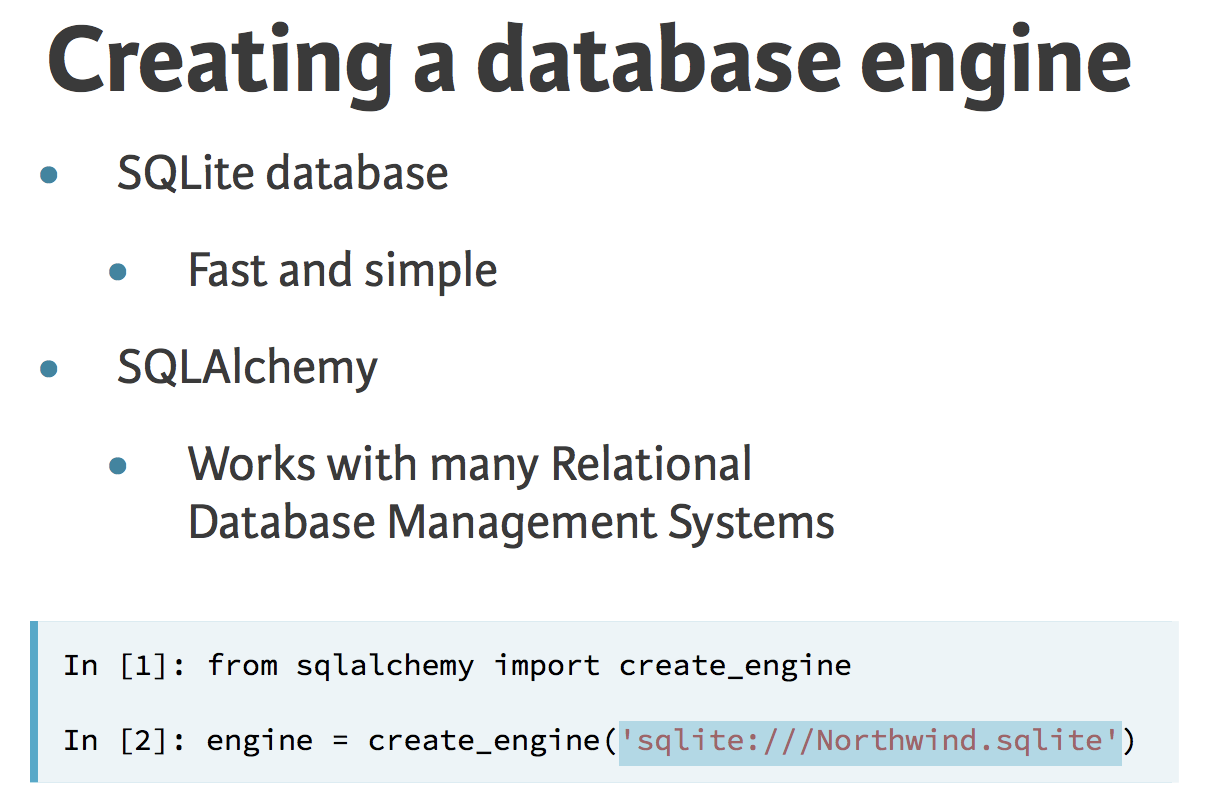

In [19]:
Image('rdbase.png')

To print all table name:

    engine.table_names()

    from sqlalchemy import create_engine
    import pandas as pd
    engine = create_engine('sqlite:///Northwind.sqlite')
    con = engine.connect()
    rs = con.execute("SELECT * FROM Orders")
    df = pd.DataFrame(rs.fetchall())
    con.close() 

Using the Context Manager:

    from sqlalchemy import create_engine
    import pandas as pd
    engine = create_engine('sqlite:///Northwind.sqlite')
    with engine.connect() as con:
        ...: rs = con.execute("SELECT OrderID, OrderDate,
        ShipName FROM Orders")
        ...: df = pd.DataFrame(rs.fetchmany(size=5))
        ...: df.columns = rs.keys()

In [ ]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("SELECT * FROM Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())

In [ ]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute('SELECT LastName, Title FROM Employee')
    df = pd.DataFrame(rs.fetchmany(size=3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

In [ ]:
# The Pandas way to query
pd.read_sql_query('SELECT ....', create_engine(''))